In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from sklearn.linear_model import LinearRegression

In [2]:
markers = ['o', 'v', 's', 'X', 'd', '*', 'p', '>']
colors = ['C3', 'C0', 'C1', 'C2']

# No Noise

In [19]:
csv_files = ["spline_tests/function_approx/csv_files/radial_mse_error.csv", 
             "spline_tests/function_approx/csv_files/nonlinear_sin_mse_error.csv",
             "spline_tests/function_approx/csv_files/exp_sin_mse_error.csv"]

text_labels = [r"(A) $\sin((4x-0.5)^2 + (4y-0.5)^2)$", 
               r"(B) $\sin(8x^2)\,\sin(8y^2)$",
               r"(C) $\exp((4x-0.5))\,\sin(4x-0.5)$"]

In [20]:
for filename in csv_files:
    df = np.log10(np.sqrt(pd.read_csv(filename, index_col=0)))
    
    print(filename)
    for i in range(2):
        X = np.arange(1, len(df) + 1).reshape(-1, 1)
        y = df.iloc[:, i]
        
        model = LinearRegression().fit(X, y)
        print(f"{model.coef_[0]:.4f}")

spline_tests/function_approx/csv_files/radial_mse_error.csv
-0.5023
-0.2049
spline_tests/function_approx/csv_files/nonlinear_sin_mse_error.csv
-0.4673
-0.2249
spline_tests/function_approx/csv_files/exp_sin_mse_error.csv
-0.7634
-0.2169


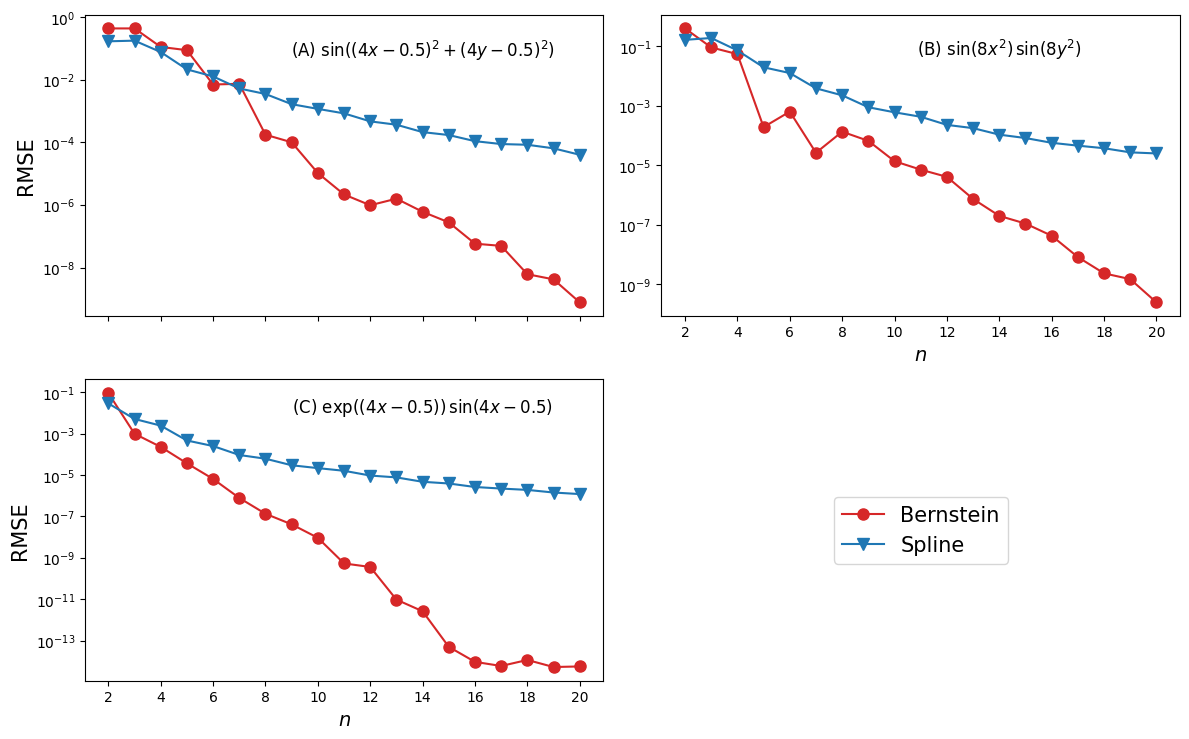

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(12, 7.5))

for i in range(3):
    row = i // 2
    col = i % 2
    
    df = np.sqrt(pd.read_csv(csv_files[i], index_col=0))
    for j, col_name in enumerate(df.columns):
        axs[row, col].plot(df[col_name], marker=markers[j], color=colors[j], label=col_name, markersize=8)
    axs[row, col].set_yscale('log')
    axs[row, col].yaxis.set_minor_locator(mticker.LogLocator(numticks=1, subs="auto"))
    
    x_ticks_locations = np.arange(2, 20 + 1, 2)
    if i == 0:
        axs[row, col].set_xticks(x_ticks_locations, [None] * len(x_ticks_locations))
    else:
        axs[row, col].set_xticks(x_ticks_locations, x_ticks_locations)
    
    x_loc = 14
    y_loc = df.iloc[0, 0] * 0.2
    axs[row, col].text(x_loc, y_loc, text_labels[i], fontsize=12, 
                       fontweight='normal', fontstyle='normal', 
                       horizontalalignment='center', verticalalignment='center')
    
    if col == 0:
        axs[row, col].set_ylabel(r"RMSE", fontsize=15)
    
axs[0, 1].set_xlabel("$n$", fontsize=14)
axs[1, 0].set_xlabel("$n$", fontsize=14)

for i, col in enumerate(df.columns):
    axs[1, 1].plot([], [], marker=markers[i], color=colors[i], label=col, markersize=8)
axs[1, 1].legend(loc='center', fontsize=15)
axs[1, 1].axis('off')
    
plt.tight_layout()

plt.savefig("gam_bernstein_convergence.png", dpi=100)

# Noisy Functions

In [6]:
import seaborn as sns

In [22]:
noise_str = "\n$+\\mathcal{N}(0, 0.1^2)$"

csv_files = ["spline_tests/noisy_function/csv_files/radial_mse_error.csv", 
             "spline_tests/noisy_function/csv_files/nonlinear_sin_mse_error.csv",
             "spline_tests/noisy_function/csv_files/exp_sin_mse_error.csv"]

text_labels = [r"$\sin((4(x-0.5))^2 + (4(y-0.5)^2)$" + noise_str, 
               r"$\sin(8x^2)\,\sin(8y^2)$" + noise_str,
               r"$\exp((4x-0.5))\,\sin(4x-0.5)$" + noise_str]

In [23]:
dfs = []
for label, file in zip(text_labels, csv_files):
    df = pd.read_csv(file, index_col=0)
    df = pd.melt(np.sqrt(df), var_name='Approximator', value_name='MSE')
    df.loc[:, "Name"] = label
    
    dfs.append(df)
    
combined = pd.concat(dfs)

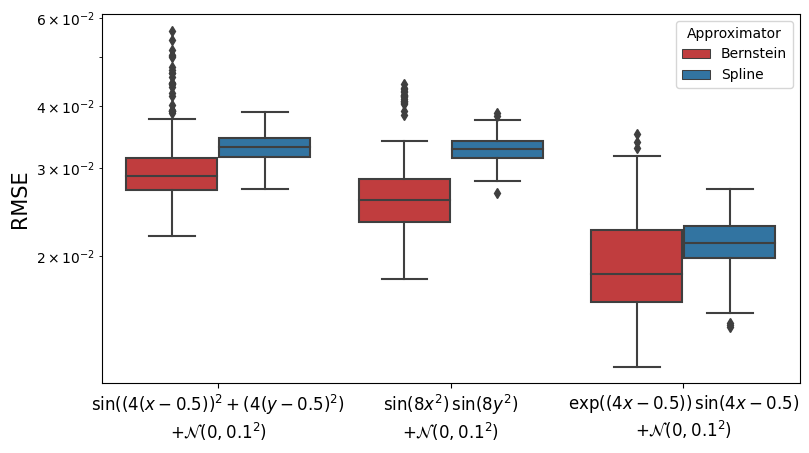

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4.8))
sns.boxplot(data=combined, x="Name", y="MSE", hue="Approximator", ax=ax, palette=colors)

ax.set_xlabel("")
ax.set_ylabel("RMSE", fontsize=15)

ax.set_xticks([0, 1, 2], text_labels, fontsize=12)
ax.set_yticks([2e-2, 3e-2, 4e-2, 6e-2], [str(x) for x in [0.02, 0.03, 0.04, 0.06]])

# plt.tight_layout()

plt.yscale('log')
plt.savefig("gam_bernstein_noisy_boxplot.png", dpi=120, bbox_inches='tight')